<a href="https://colab.research.google.com/github/jayahe/Deep_Learning_using_Keras/blob/master/Classification_model_using_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image processing 
### Classification model using CNN and Keras
##### Dataset used is fashion MNSIT data

In [0]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D ,Dropout, Flatten

In [0]:
## Import data
from tensorflow.keras.datasets import fashion_mnist

(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [0]:
labelMap = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
print(train_images[1,:,:].shape)
train_images[0,:,:]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_images.shape[1:]

(28, 28)

Training data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)
Total number of outputs:  10
Output classes:  [0 1 2 3 4 5 6 7 8 9]


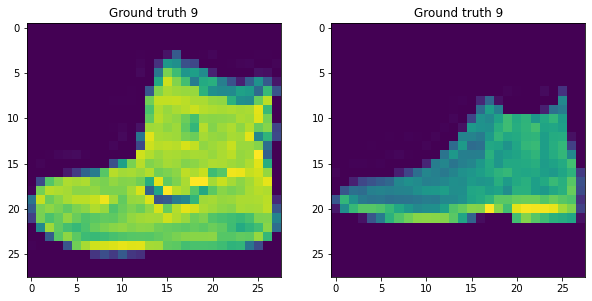

In [8]:
## Explore data
print('Training data shape: ', train_images.shape)
print('Test data shape: ', test_images.shape)

classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs: ', nClasses)
print('Output classes: ', classes)

plt.figure(figsize=[10,5])
### Train data
plt.subplot(121)
plt.imshow(train_images[0,:,:])
plt.title('Ground truth {}'.format(train_labels[0]))

### Test data
plt.subplot(122)
plt.imshow(test_images[0,:,:])
plt.title('Ground truth {}'.format(test_labels[0]))

plt.show()

In [0]:
## Preprocess data
from tensorflow.keras.utils import to_categorical

# find the shape of input images and create the variable input_shape
nDims = 1
nRows,nCols = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0],nRows,nCols,nDims)
test_data = test_images.reshape(test_images.shape[0],nRows,nCols,nDims)
input_shape = (nRows, nCols,nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# scale the data to lie between 0 and 1
train_data /= 255
test_data /= 255

# convert labels in to one hot encoded data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [10]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])
print('-'*20)
print('Original label 0 : ', train_labels[5])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[5])

Original label 0 :  9
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
--------------------
Original label 0 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
train_data.shape

(60000, 28, 28, 1)

### Define the model

For implementing a CNN, we will stack up Convolutional Layers, followed by Max Pooling layers. We will also include Dropout to avoid overfitting.

Finally, we will add a fully connected ( Dense ) layer followed by a softmax layer. Given below is the model structure.

We use 6 convolutional layers and 1 fully-connected layer.

- The first 2 convolutional layers have 32 filters / kernels with a window size of 3×3.
- The remaining conv layers have 64 filters.
- We also add a max pooling layer with window size 2×2 after each pair of conv layer.
- We add a dropout layer with a dropout ratio of 0.25 after every pooling layer.
- In the final line, we add the dense layer which performs the classification among 10 classes using a softmax layer.


In [0]:
def createmodel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model


### Train the model

We will employ the same Keras workflow that we learnt in the previous section. We create the model and use the compile and fit methods to train the network.

If we check the model summary we can see the shapes of each layer.

It shows that since we have used padding in the first layer, the output shape is same as the input ( 32×32 ). But the second conv layer shrinks by 2 pixels in both dimensions. Also, the output size after pooling layer decreases by half since we have used a stride of 2 and a window size of 2×2. The final droupout layer has an output of 2x2x64. This has to be converted to a single array. This is done by the flatten layer which converts the 3D array into a 1D array of size 2x2x64 = 256. The final layer has 10 nodes since there are 10 classes.

Since it is a 10 class classification problem, we will use a categorical cross entropy loss and use RMSProp optimizer to train the network. We will run it for 20 epochs.

In [13]:
model_1 = createmodel()

batch_size = 256
epochs = 20
model_1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [14]:
history = model_1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
# test_loss,test_accuracy = model_1.evaluate(test_data, test_labels_one_hot)

Epoch 1/20
235/235 [==============================] - 98s 416ms/step - loss: 0.9189 - accuracy: 0.6503 - val_loss: 0.5550 - val_accuracy: 0.7904
Epoch 2/20
235/235 [==============================] - 97s 413ms/step - loss: 0.5112 - accuracy: 0.8097 - val_loss: 0.4382 - val_accuracy: 0.8341
Epoch 3/20
235/235 [==============================] - 97s 413ms/step - loss: 0.4090 - accuracy: 0.8501 - val_loss: 0.3483 - val_accuracy: 0.8733
Epoch 4/20
235/235 [==============================] - 97s 413ms/step - loss: 0.3512 - accuracy: 0.8709 - val_loss: 0.4390 - val_accuracy: 0.8433
Epoch 5/20
235/235 [==============================] - 96s 411ms/step - loss: 0.3175 - accuracy: 0.8860 - val_loss: 0.2966 - val_accuracy: 0.8947
Epoch 6/20
235/235 [==============================] - 97s 412ms/step - loss: 0.2914 - accuracy: 0.8941 - val_loss: 0.2803 - val_accuracy: 0.8948
Epoch 7/20
235/235 [==============================] - 97s 414ms/step - loss: 0.2751 - accuracy: 0.8996 - val_loss: 0.3064 - val_ac

### Check the loss and accuracy curves

We use the history method while training to store the accuracy and loss values over the iterations. We plot the values to see how the network accuracy and loss changed while training.

Text(0.5, 1.0, 'Loss Curves')

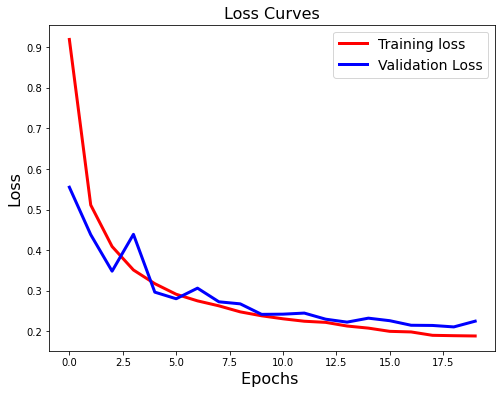

In [16]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

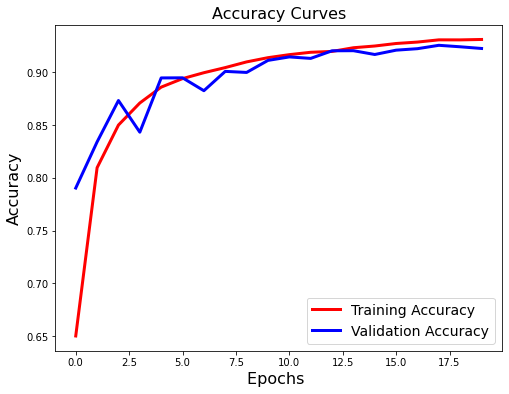

In [17]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

From the above curves, we can see that there is a considerable difference between the training and validation loss. This indicates that the network has tried to memorize the training data and thus, is able to get better accuracy on it. This is a sign of Overfitting. But we have already used Dropout in the network, then why is it still overfitting. We will see if we can further reduce overfitting using something else.



### Inference


Now that the model has trained and we are getting a decent accuracy on the test set, we should check the results visually too.

Let us check what output we got for the first test image.

In [0]:
import warnings
warnings.filterwarnings('ignore')

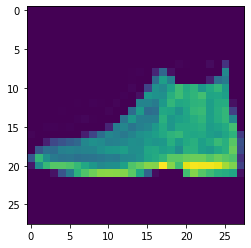

Label = 9, Item = Ankle boot


In [23]:
testSample = test_data[0,:]
plt.imshow(testSample.reshape(28,28));
plt.show()

# label = np.argmax(model_1.predict(testSample), axis=-1)
label = model_1.predict_classes(testSample.reshape(1,28,28,nDims))[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

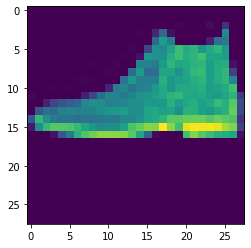

Label = 9, Item = Ankle boot


In [24]:
shiftUp = np.zeros(testSample.shape)
shiftUp[1:20,:] = testSample[6:25,:]
plt.imshow(shiftUp.reshape(28,28));
plt.show()

label = model_1.predict_classes(shiftUp.reshape(1,28,28,nDims))[0]
print("Label = {}, Item = {}".format(label,labelMap[label]))

### Exercise 


1. Use the CIFAR10 dataset instead of Fashion MNIST and see what changes you need to make to the code
2. Train it for extended periods and see what changes occur from the curves.